In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [22]:
data = pd.read_csv(r'shanghaiData.csv', sep=",")
data.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [23]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

world_rank - 0
university_name - 1
national_rank - 1
total_score - 3796
alumni - 1
award - 2
hici - 2
ns - 22
pub - 2
pcp - 2
year - 0


In [24]:
data.shape

(4897, 11)

In [25]:
data.dtypes

world_rank          object
university_name     object
national_rank       object
total_score        float64
alumni             float64
award              float64
hici               float64
ns                 float64
pub                float64
pcp                float64
year                 int64
dtype: object

In [26]:
data.isnull().sum()

world_rank            0
university_name       1
national_rank         1
total_score        3796
alumni                1
award                 2
hici                  2
ns                   22
pub                   2
pcp                   2
year                  0
dtype: int64

1. Обработка пропусков в данных

1.1. Простые стратегии - удаление или заполнение нулями

In [7]:
# Удаление колонок, содержащих пустые значения
data1 = data.dropna(axis=1, how='any')
(data.shape, data1.shape)

((2603, 14), (2603, 10))

In [8]:
# Удаление строк, содержащих пустые значения
data2 = data.dropna(axis=0, how='any')
(data.shape, data2.shape)

((2603, 14), (2362, 14))

In [9]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data3 = data.fillna(0)
data3.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,0,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [27]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 4897


1.2. "Внедрение значений" - импьютация (imputation)

1.2.1. Обработка пропусков в числовых данных

In [28]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка total_score. Тип данных float64. Количество пустых значений 3796, 77.52%.
Колонка alumni. Тип данных float64. Количество пустых значений 1, 0.02%.
Колонка award. Тип данных float64. Количество пустых значений 2, 0.04%.
Колонка hici. Тип данных float64. Количество пустых значений 2, 0.04%.
Колонка ns. Тип данных float64. Количество пустых значений 22, 0.45%.
Колонка pub. Тип данных float64. Количество пустых значений 2, 0.04%.
Колонка pcp. Тип данных float64. Количество пустых значений 2, 0.04%.


In [29]:
data_num = data[num_cols]
data_num

,total_score,alumni,award,hici,ns,pub,pcp
0,100.0,100.0,100.0,100.0,100.0,100.0,72.4
1,73.6,99.8,93.4,53.3,56.6,70.9,66.9
2,73.4,41.1,72.2,88.5,70.9,72.3,65.0
3,72.8,71.8,76.0,69.4,73.9,72.2,52.7
4,70.1,74.0,80.6,66.7,65.8,64.3,53.0
5,67.1,59.2,68.6,59.8,65.8,52.5,100.0
6,62.3,79.4,60.6,56.1,54.2,69.5,45.4
7,60.9,63.4,76.8,60.9,48.7,48.5,59.1
8,60.1,75.6,81.9,50.3,44.7,56.4,42.2
9,59.7,64.3,59.1,48.4,55.6,68.4,53.2


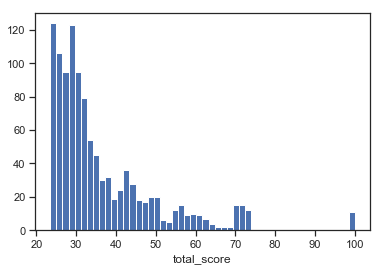

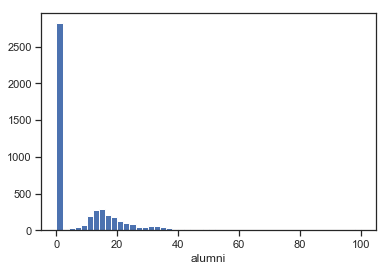

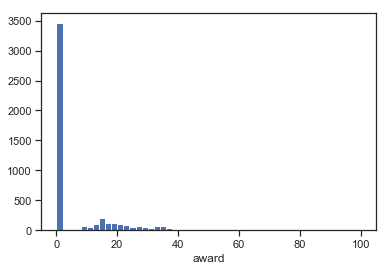

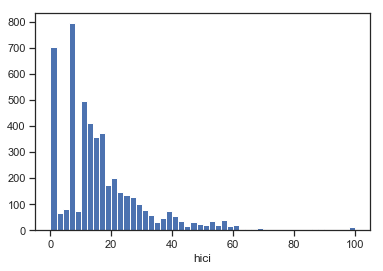

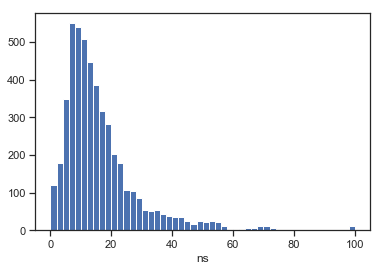

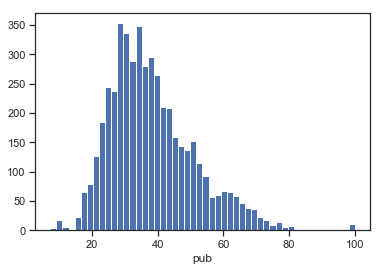

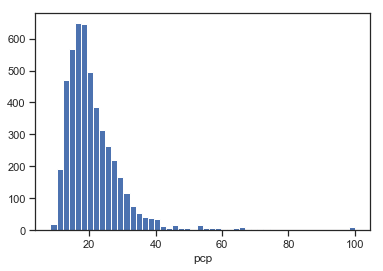

In [30]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [31]:
# Фильтр по пустым значениям поля MasVnrArea 
data[data['total_score'].isnull()]

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
100,101-152,Aarhus University,2,NaN,15.4,19.3,7.9,22.3,41.6,22.4,2005
101,101-152,Arizona State University - Tempe,54-71,NaN,0.0,14.4,20.8,26.3,41.9,17.5,2005
102,101-152,Baylor College of Medicine,54-71,NaN,0.0,0.0,17.6,34.5,44.0,24.9,2005
103,101-152,Catholic University of Leuven,1-4,NaN,0.0,0.0,19.2,16.0,48.7,23.1,2005
104,101-152,Catholic University of Louvain,1-4,NaN,14.0,13.9,13.6,8.3,44.7,26.9,2005
105,101-152,College of France,5,NaN,15.4,37.4,11.1,11.7,16.9,19.3,2005
106,101-152,Dartmouth College,54-71,NaN,24.3,0.0,20.8,22.0,33.0,29.1,2005
107,101-152,Emory University,54-71,NaN,0.0,0.0,28.3,19.0,48.4,21.6,2005
108,101-152,Georgia Institute of Technology,54-71,NaN,16.6,0.0,23.6,19.0,43.9,25.8,2005
109,101-152,Ghent University,1-4,NaN,8.9,15.8,15.7,9.1,48.8,27.2,2005


In [33]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['total_score'].isnull()].index
flt_index

Int64Index([ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
            ...
            4887, 4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896],
           dtype='int64', length=3796)

In [34]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
100,101-152,Aarhus University,2,NaN,15.4,19.3,7.9,22.3,41.6,22.4,2005
101,101-152,Arizona State University - Tempe,54-71,NaN,0.0,14.4,20.8,26.3,41.9,17.5,2005
102,101-152,Baylor College of Medicine,54-71,NaN,0.0,0.0,17.6,34.5,44.0,24.9,2005
103,101-152,Catholic University of Leuven,1-4,NaN,0.0,0.0,19.2,16.0,48.7,23.1,2005
104,101-152,Catholic University of Louvain,1-4,NaN,14.0,13.9,13.6,8.3,44.7,26.9,2005
105,101-152,College of France,5,NaN,15.4,37.4,11.1,11.7,16.9,19.3,2005
106,101-152,Dartmouth College,54-71,NaN,24.3,0.0,20.8,22.0,33.0,29.1,2005
107,101-152,Emory University,54-71,NaN,0.0,0.0,28.3,19.0,48.4,21.6,2005
108,101-152,Georgia Institute of Technology,54-71,NaN,16.6,0.0,23.6,19.0,43.9,25.8,2005
109,101-152,Ghent University,1-4,NaN,8.9,15.8,15.7,9.1,48.8,27.2,2005


In [36]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['total_score']

100    NaN
101    NaN
102    NaN
103    NaN
104    NaN
105    NaN
106    NaN
107    NaN
108    NaN
109    NaN
110    NaN
111    NaN
112    NaN
113    NaN
114    NaN
115    NaN
116    NaN
117    NaN
118    NaN
119    NaN
120    NaN
121    NaN
122    NaN
123    NaN
124    NaN
125    NaN
126    NaN
127    NaN
128    NaN
129    NaN
        ..
4867   NaN
4868   NaN
4869   NaN
4870   NaN
4871   NaN
4872   NaN
4873   NaN
4874   NaN
4875   NaN
4876   NaN
4877   NaN
4878   NaN
4879   NaN
4880   NaN
4881   NaN
4882   NaN
4883   NaN
4884   NaN
4885   NaN
4886   NaN
4887   NaN
4888   NaN
4889   NaN
4890   NaN
4891   NaN
4892   NaN
4893   NaN
4894   NaN
4895   NaN
4896   NaN
Name: total_score, Length: 3796, dtype: float64

In [37]:
data_num_MasVnrArea = data_num[['total_score']]
data_num_MasVnrArea.head()

,total_score
0,100.0
1,73.6
2,73.4
3,72.8
4,70.1


In [38]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [39]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [40]:
strategies=['mean', 'median','most_frequent']

In [41]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [42]:
strategies[0], test_num_impute(strategies[0])

('mean', array([36.38346957, 36.38346957, 36.38346957, ..., 36.38346957,
        36.38346957, 36.38346957]))

In [44]:
strategies[1], test_num_impute(strategies[1])

('median', array([31.3, 31.3, 31.3, ..., 31.3, 31.3, 31.3]))

In [45]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([24.9, 24.9, 24.9, ..., 24.9, 24.9, 24.9]))

In [46]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [49]:
data[['hici']].describe()

,hici
count,4895.000000
mean,16.221491
std,14.382710
min,0.000000
25%,7.300000
50%,12.600000
75%,21.700000
max,100.000000


In [50]:
test_num_impute_col(data, 'hici', strategies[0])

('hici', 'mean', 2, 16.22149131767109, 16.22149131767109)

In [51]:
test_num_impute_col(data, 'hici', strategies[1])

('hici', 'median', 2, 12.6, 12.6)

In [52]:
test_num_impute_col(data, 'hici', strategies[2])

('hici', 'most_frequent', 2, 0.0, 0.0)

1.2.2. Обработка пропусков в категориальных данных

In [53]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка university_name. Тип данных object. Количество пустых значений 1, 0.02%.
Колонка national_rank. Тип данных object. Количество пустых значений 1, 0.02%.


In [54]:
cat_temp_data = data[['national_rank']]
cat_temp_data.head()

,national_rank
0,1
1,1
2,2
3,3
4,4


In [56]:
cat_temp_data['national_rank'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '26', '27', '28', '29', '30', '32', '33', '35', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54-71', '1-4', '6-9', '2-4', '12-15',
       '3-4', '6-11', '2-3', '1-2', '72-90', '16-19', '5-7', '6-8', '5-6',
       '12-16', '4-5', '9-13', '9-17', '8-9', '91-119', '10-13', '20-30',
       '7-9', '17-23', '1-3', '120-140', '18-19', '14-24', '24-33',
       '14-19', '10-11', '3-7', '10-18', '3-5', '31-36', '5-9', '141-168',
       '25-34', '11-14', '34-40', '20-23', '19-23', '37-40', '20-21',
       '25', '31', '34', '36', '54', '55-69', '16-22', '70-87', '4-6',
       '88-118', '7-12', '9-16', '10-12', '23-33', '2-5', '119-140',
       '17-19', '13-20', '23-36', '13-17', '6-7', '8-14', '34-37',
       '38-43', '141-167', '18-21', '21-32', '15-23', '20-22', '55-70',


In [57]:
cat_temp_data[cat_temp_data['national_rank'].isnull()].shape

(1, 1)

In [58]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['1'],
       ['1'],
       ['2'],
       ...,
       ['126-146'],
       ['4-6'],
       ['126-146']], dtype=object)

In [59]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['1', '1-2', '1-3', '1-4', '1-5', '1-6', '1.0', '10', '10-11',
       '10-12', '10-13', '10-14', '10-17', '10-18', '10.0', '103-125',
       '105-125', '11', '11-12', '11-14', '11-15', '11-16', '11-17',
       '11-20', '11-22', '11.0', '111-137', '112-137', '113-138',
       '115-139', '118-140', '119-140', '12', '12-14', '12-15', '12-16',
       '12-17', '12-19', '12.0', '120-140', '126-146', '13', '13-17',
       '13-18', '13-20', '13-21', '13-22', '13-23', '13-25', '13.0',
       '138-151', '138-154', '139-152', '14', '14-17', '14-18', '14-19',
       '14-21', '14-22', '14-24', '14-27', '14.0', '140-159', '141-166',
       '141-167', '141-168', '15', '15-17', '15-19', '15-20', '15-22',
       '15-23', '15-24', '15.0', '16', '16-18', '16-19', '16-22', '16-23',
       '16.0', '17', '17-18', '17-19', '17-22', '17-23', '17.0', '18',
       '18-19', '18-20', '18-21', '18-23', '18-25', '18.0', '19', '19-20',
       '19-21', '19-22', '19-23', '19-31', '19-33', '19.0', '2', '2-3',
   

In [60]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['1'],
       ['1'],
       ['2'],
       ...,
       ['126-146'],
       ['4-6'],
       ['126-146']], dtype=object)

In [61]:
np.unique(data_imp3)

array(['!!!', '1', '1-2', '1-3', '1-4', '1-5', '1-6', '1.0', '10',
       '10-11', '10-12', '10-13', '10-14', '10-17', '10-18', '10.0',
       '103-125', '105-125', '11', '11-12', '11-14', '11-15', '11-16',
       '11-17', '11-20', '11-22', '11.0', '111-137', '112-137', '113-138',
       '115-139', '118-140', '119-140', '12', '12-14', '12-15', '12-16',
       '12-17', '12-19', '12.0', '120-140', '126-146', '13', '13-17',
       '13-18', '13-20', '13-21', '13-22', '13-23', '13-25', '13.0',
       '138-151', '138-154', '139-152', '14', '14-17', '14-18', '14-19',
       '14-21', '14-22', '14-24', '14-27', '14.0', '140-159', '141-166',
       '141-167', '141-168', '15', '15-17', '15-19', '15-20', '15-22',
       '15-23', '15-24', '15.0', '16', '16-18', '16-19', '16-22', '16-23',
       '16.0', '17', '17-18', '17-19', '17-22', '17-23', '17.0', '18',
       '18-19', '18-20', '18-21', '18-23', '18-25', '18.0', '19', '19-20',
       '19-21', '19-22', '19-23', '19-31', '19-33', '19.0', '2', '2-

In [62]:
data_imp3[data_imp3=='!!!'].size

1